In [1]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [2]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('nhm.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\nhm\nhm.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7178239  =      0.000 ...  3505.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



C:\Users\Alberto\Documents\BCI\data\nhm\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   45.3s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   47.2s finished


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
116 events found
Event IDs: [  2   4 130 134 255]
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 116 events and 20481 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1016 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 3896 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 7928 tasks      | elapsed:   13.4s
[Parallel(n_jobs=8)]: Done 8468 out of 8468 | elapsed:   14.1s finished


saved


In [9]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\nhm\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated


Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 6928 tasks      | elapsed:    7.6s
[Parallel(n_jobs=8)]: Done 7488 out of 7488 | elapsed:    8.0s finished


Using matplotlib as 2D backend.


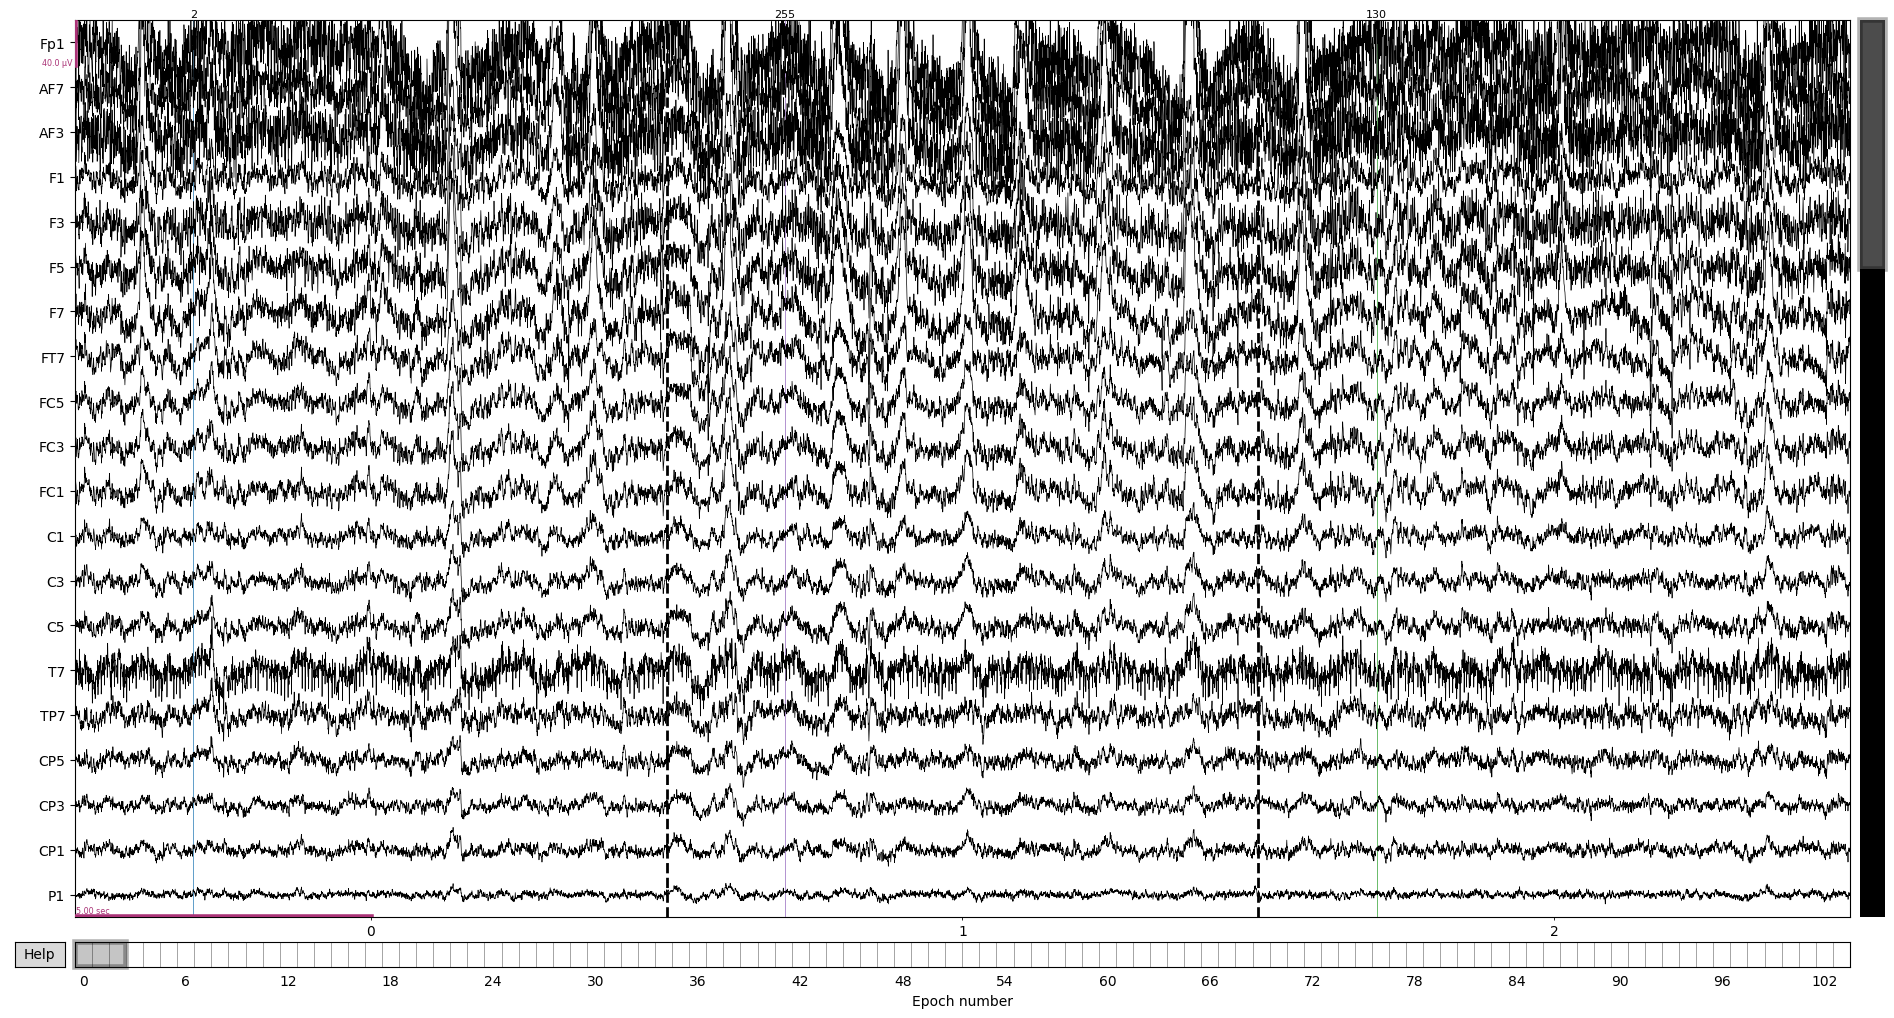

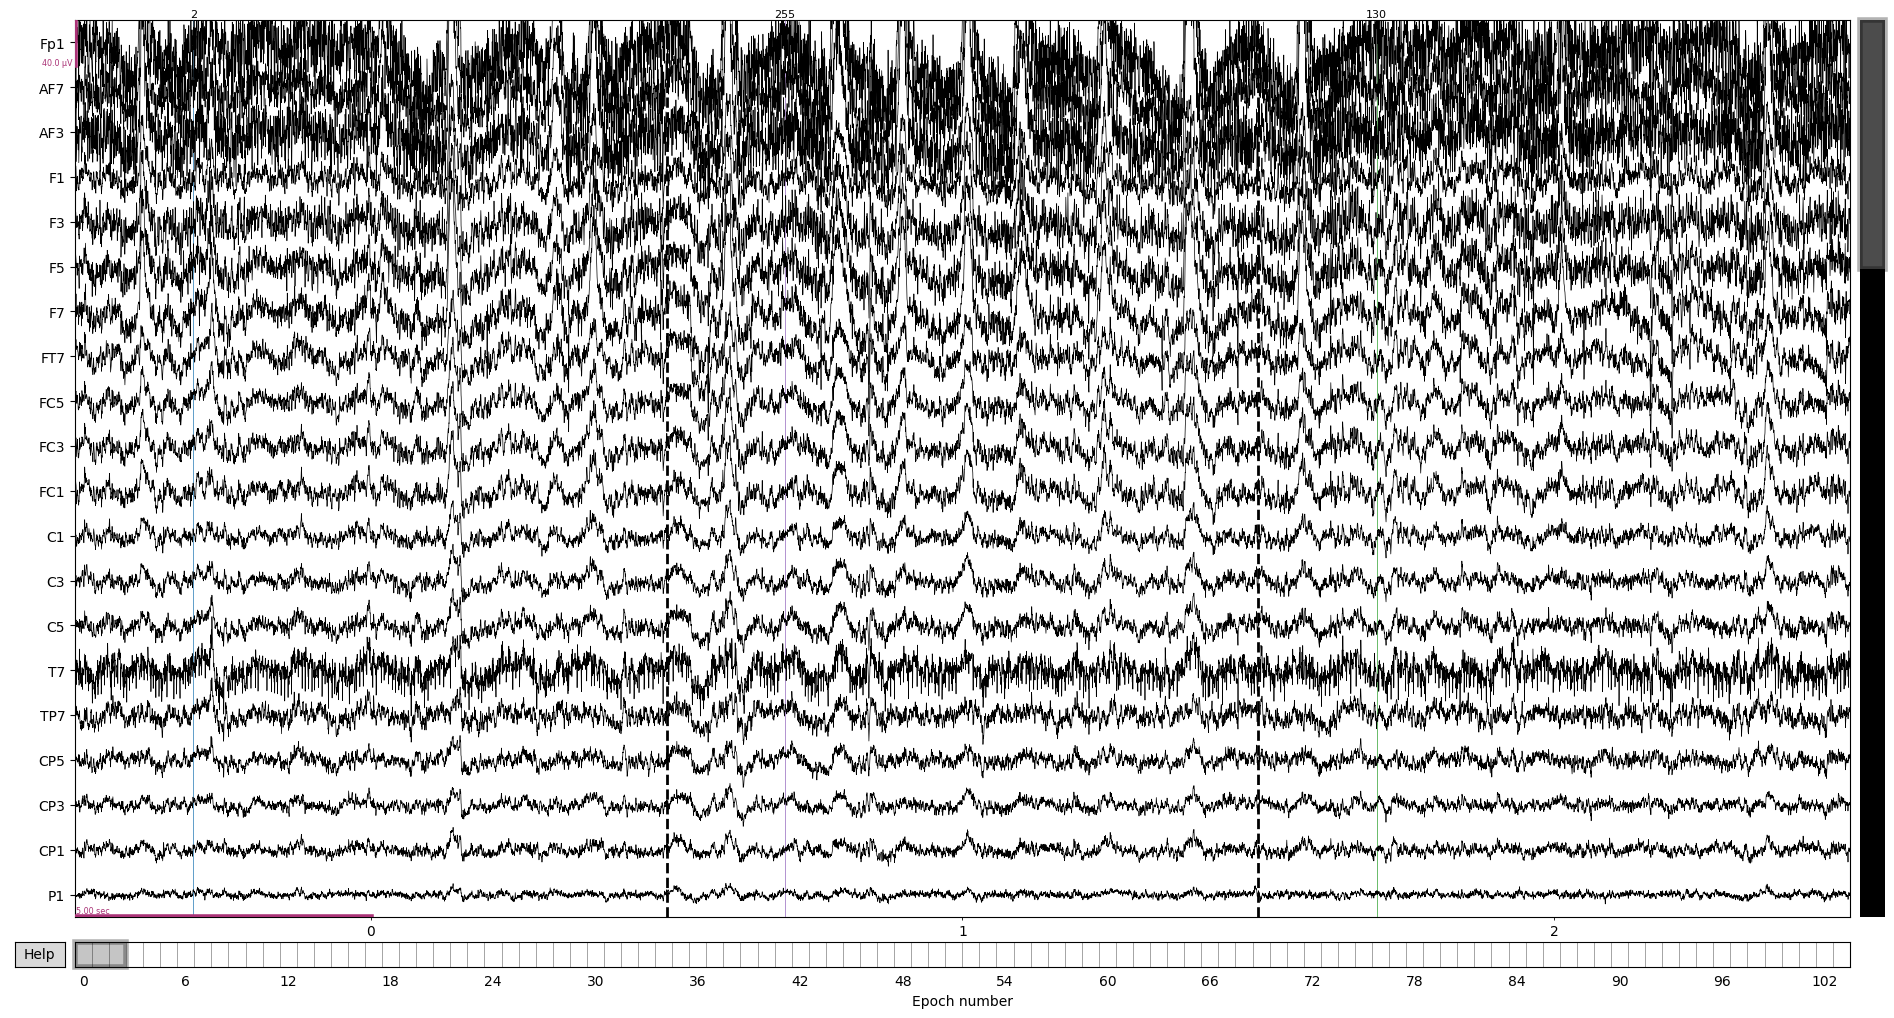

In [5]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=3, scalings=20e-6, events=raw.events)

Marking bad chanels

In [11]:
bads = ['EXG5', 'EXG7', 'O2', 'AF4', 'TP8', 'F4', 'FT8', 'Fp2', 'F1', 'Fp1', 'AF7', 'AFz','Fpz','AF8']
raw.info['bads'] = bads
raw.drop([2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 20, 22, 29, 36, 39, 41, 42, 43, 46, 52, 54, 59, 62, 68, 69, 70, 72, 75, 77, 83, 85, 88, 95, 96, 98, 99, 101, 105, 107, 108, 110, 111, 112])

Dropped 47 epochs: 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 20, 22, 29, 36, 39, 41, 42, 43, 46, 52, 54, 59, 62, 68, 69, 70, 72, 75, 77, 83, 85, 88, 95, 96, 98, 99, 101, 105, 107, 108, 110, 111, 112


<EpochsFIF |  69 events (all good), -2 - 7.99902 sec, baseline off, ~393.6 MB, data loaded,
 'r_pinch': 10
 'r_stop': 17
 'left': 15
 'right': 17
 'rest': 10>

Referencing

In [12]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [13]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  69 events (all good), -2 - 7.99902 sec, baseline off, ~393.6 MB, data loaded,
 'r_pinch': 10
 'r_stop': 17
 'left': 15
 'right': 17
 'rest': 10>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 3152 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 4416 out of 4416 | elapsed:    8.4s finished


Using matplotlib as 2D backend.


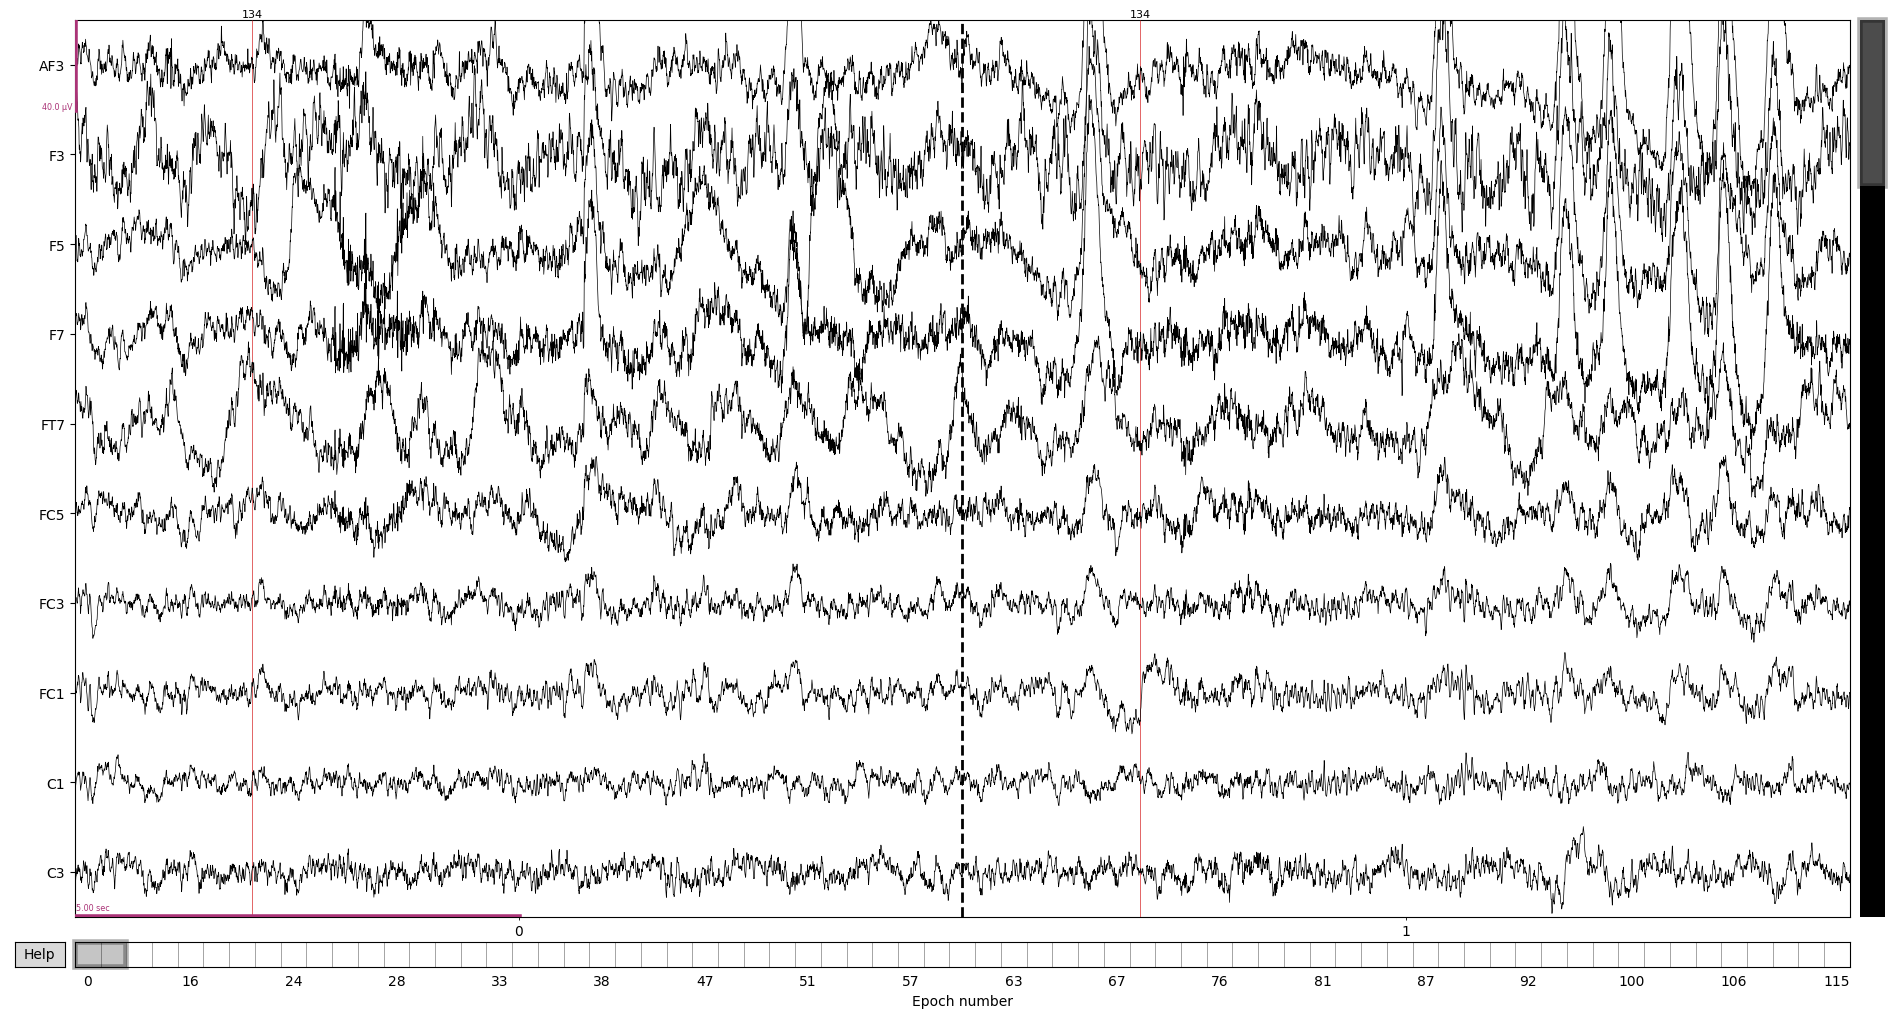

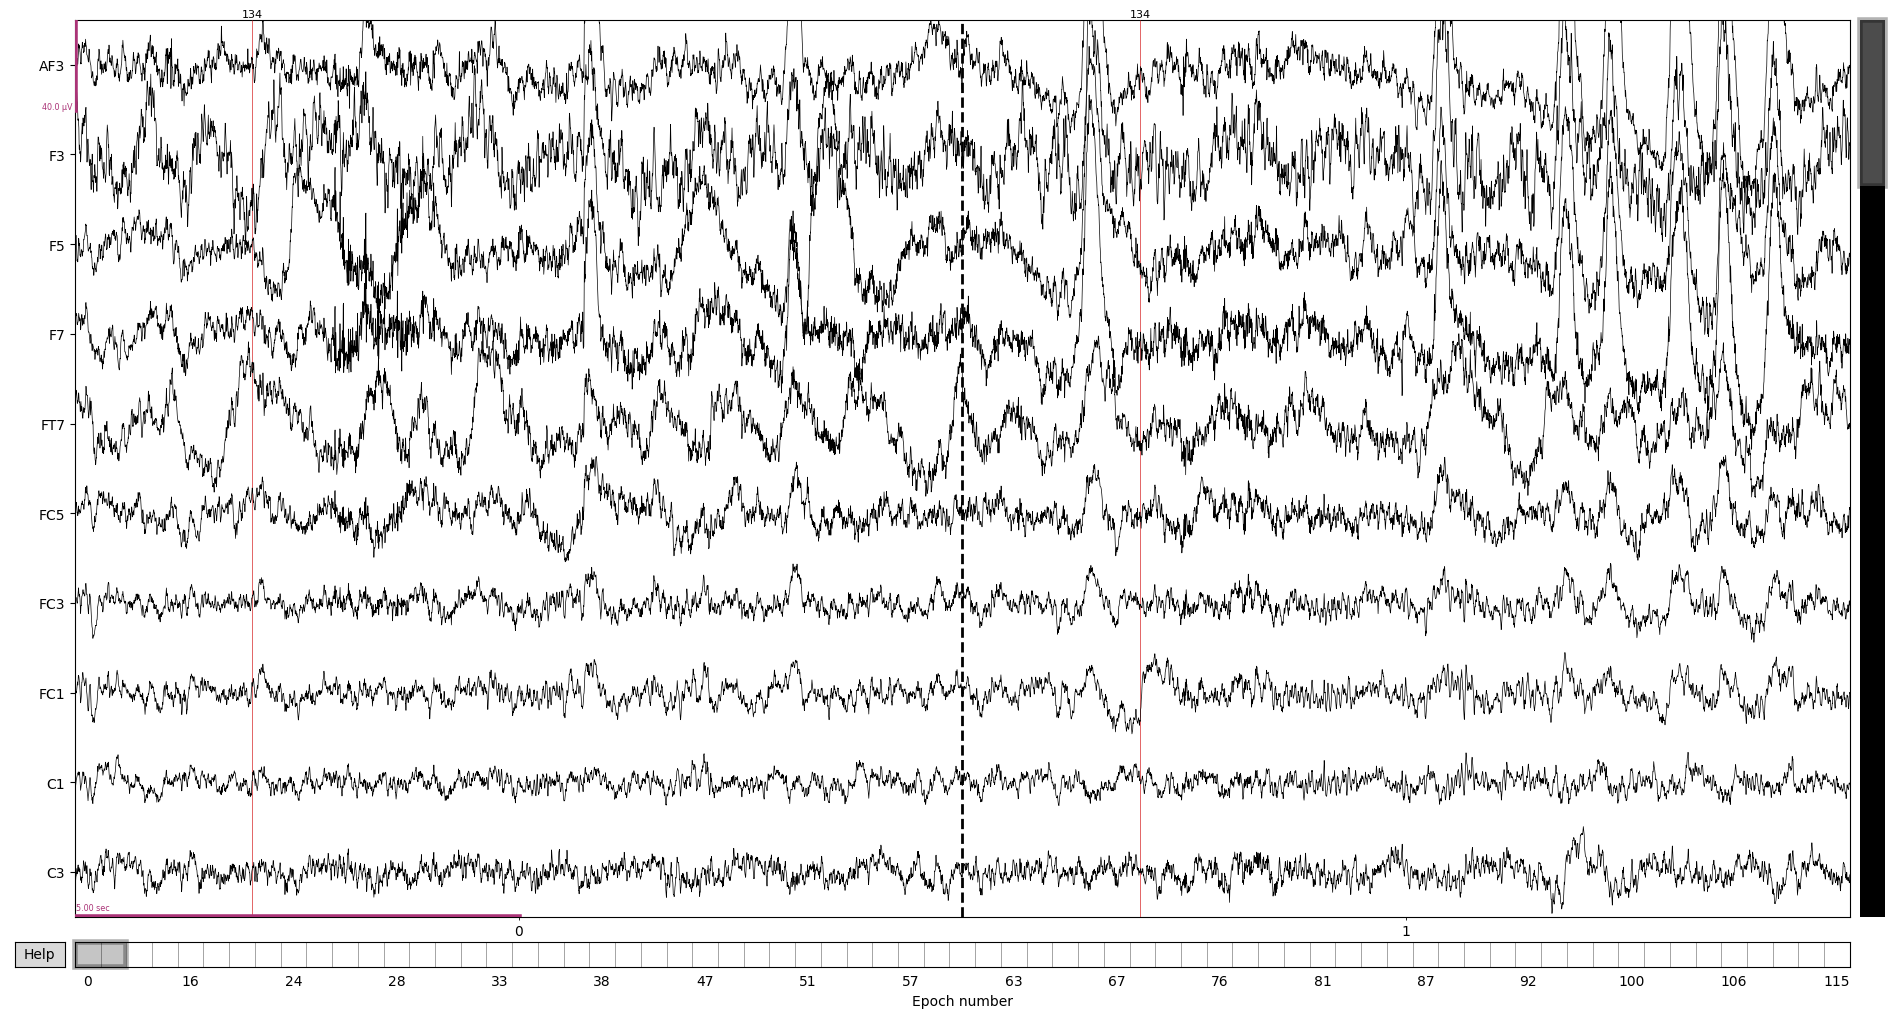

In [7]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=10, n_epochs=2, scalings=20e-6, events=referenced.events, picks=['eeg','ecg'])

In [14]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

Overwriting existing file.


REMOVE ARTIFACTS


In [15]:
epochs = read_epochs('referenced_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\nhm\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


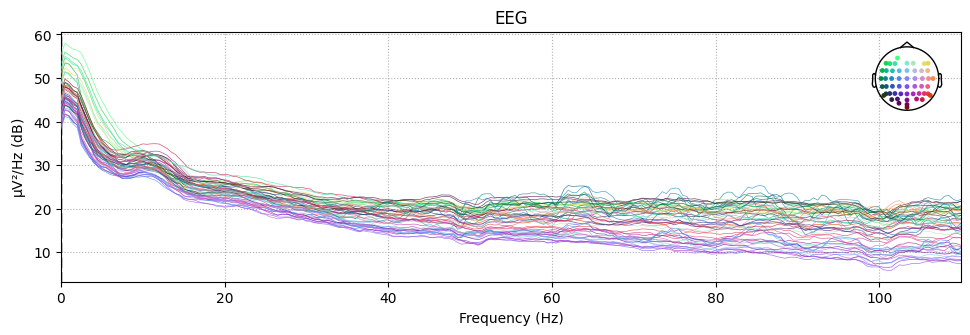

In [16]:
epochs['right','left'].copy().crop(-1,2).plot_psd(fmax=110, tmin=0, tmax=4)

EOG Regression

No projector specified for this dataset. Please consider the method self.add_proj.


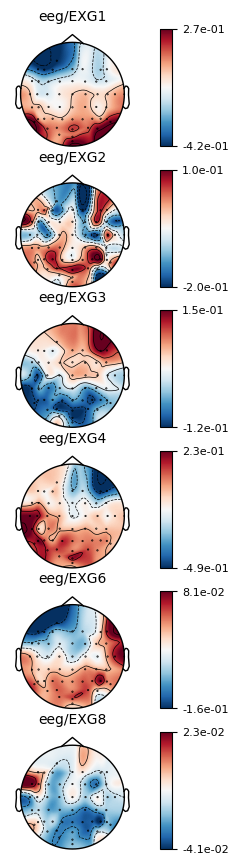

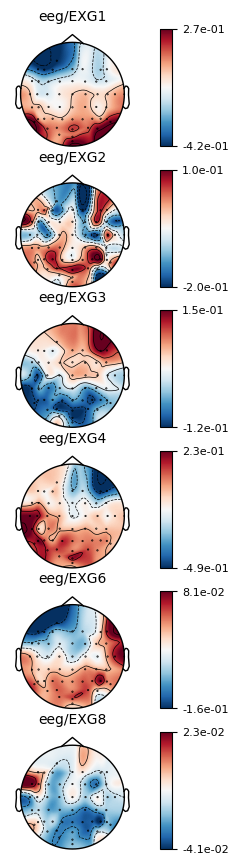

In [18]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

ICA

In [19]:
filtered = epochs['rest','left','right'].copy().filter(1,120, n_jobs=8)
filtered.apply_baseline((-1.2,-0.1))
filtered.crop(-0.5,2)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 2563 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 2688 out of 2688 | elapsed:    6.3s finished


Applying baseline correction (mode: mean)
Fitting ICA to data using 52 channels (please be patient, this may take a while)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_7928\4172179827.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(filtered)


Selecting by number: 10 components
Fitting ICA took 5.8s.


<ICA | epochs decomposition, method: picard (fit in 50 iterations on 107562 samples), 10 ICA components (52 PCA components available), channel types: eeg, no sources marked for exclusion>

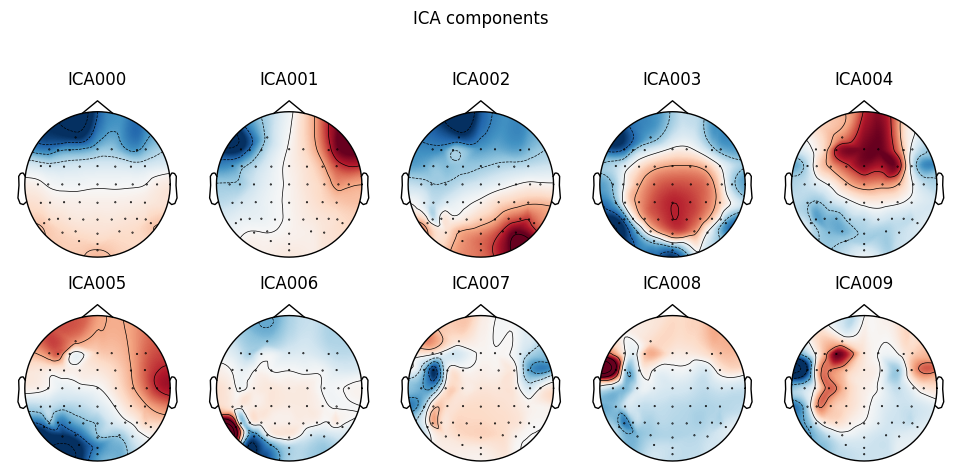

[<MNEFigure size 975x496 with 10 Axes>]

In [20]:
plot_ica_components(ica)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_7928\3695173692.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (1946), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
32 matching events found
No baseline correction applied
0 projection i

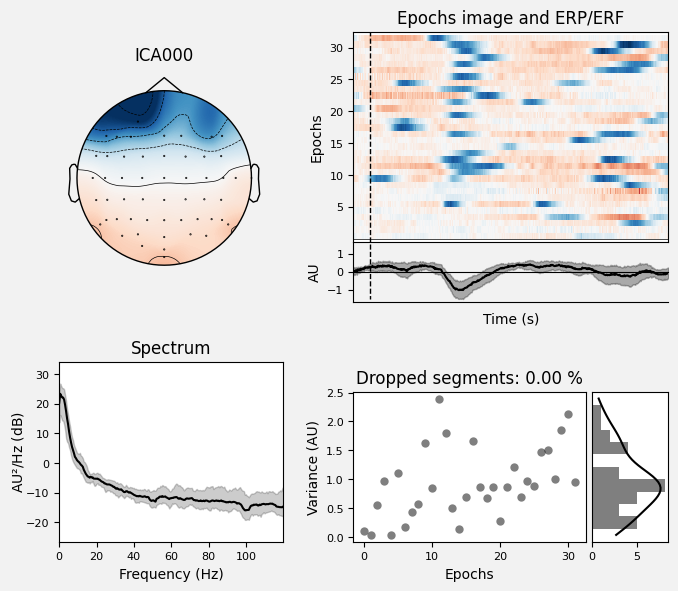

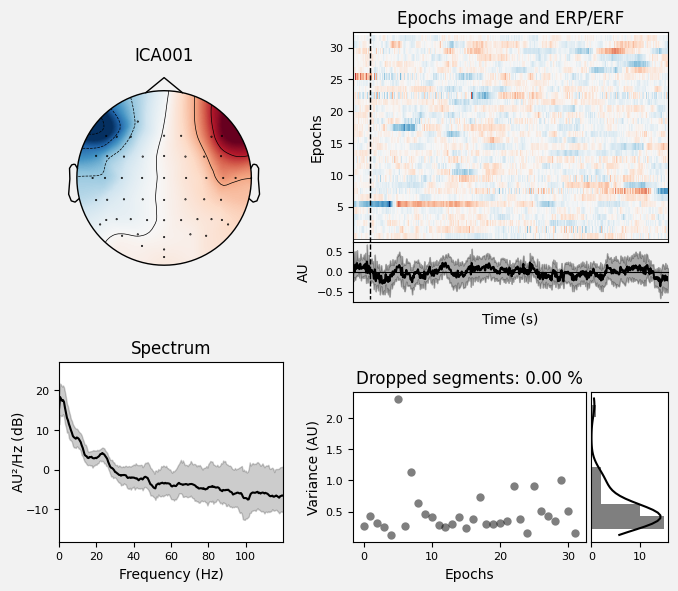

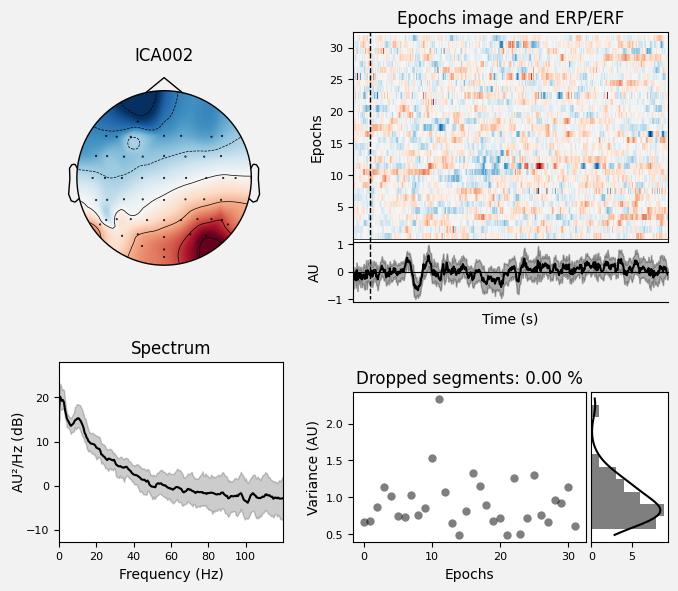

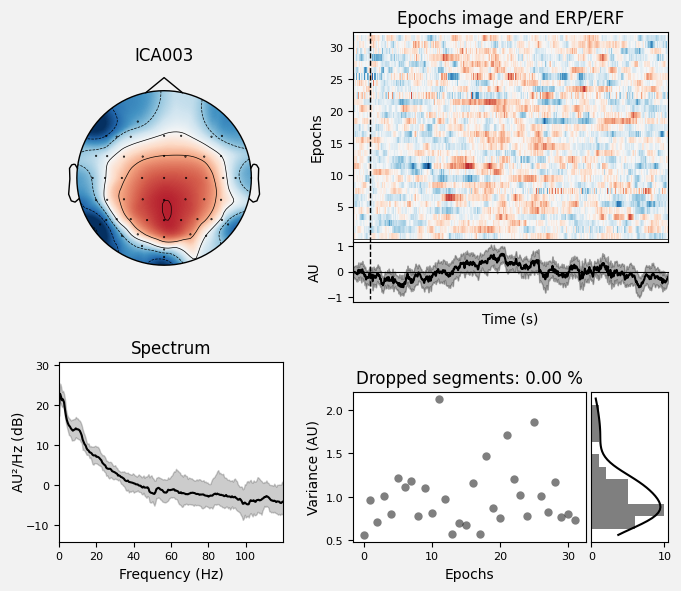

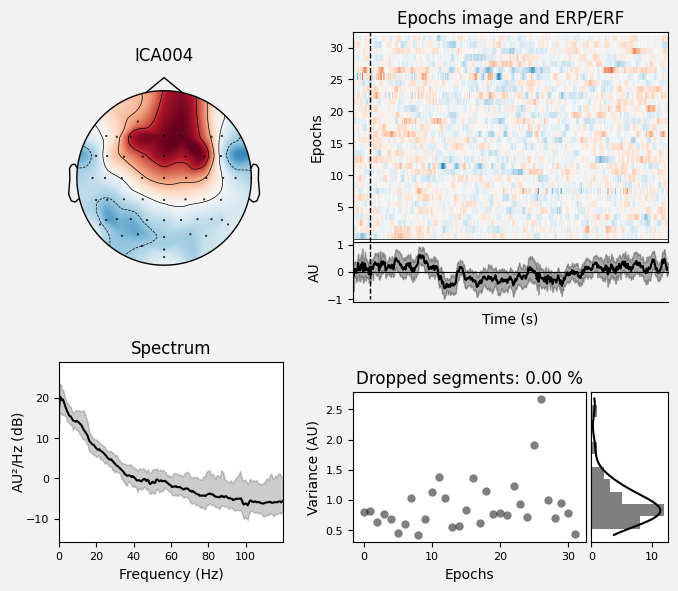

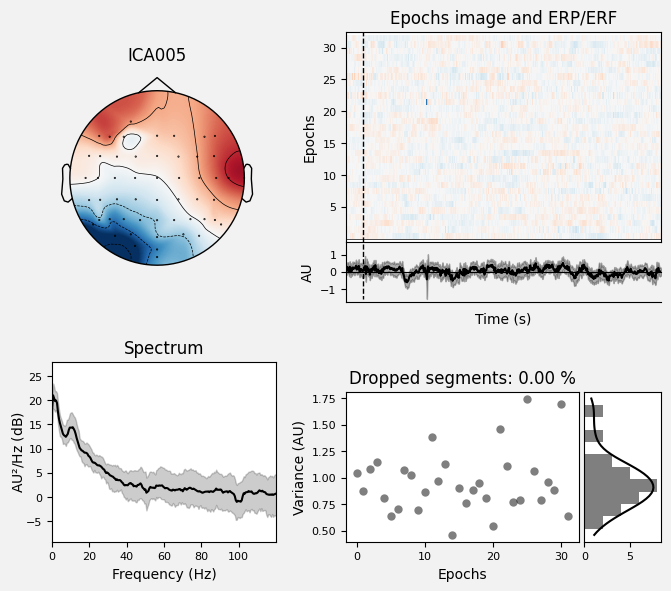

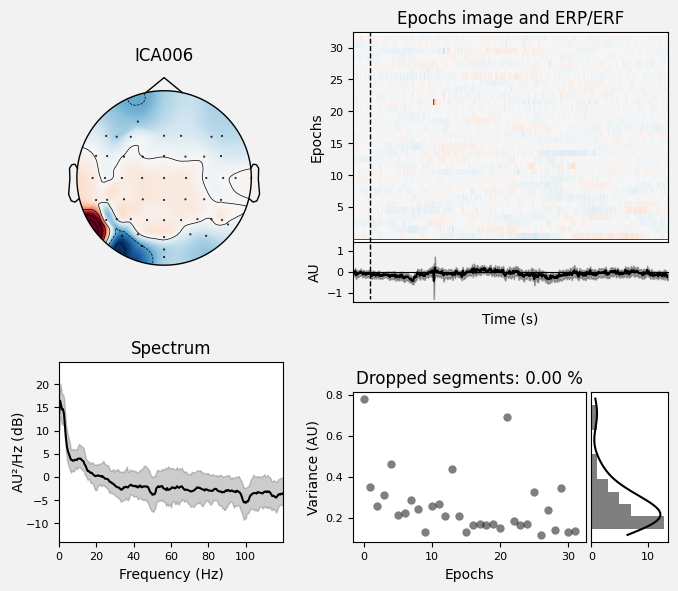

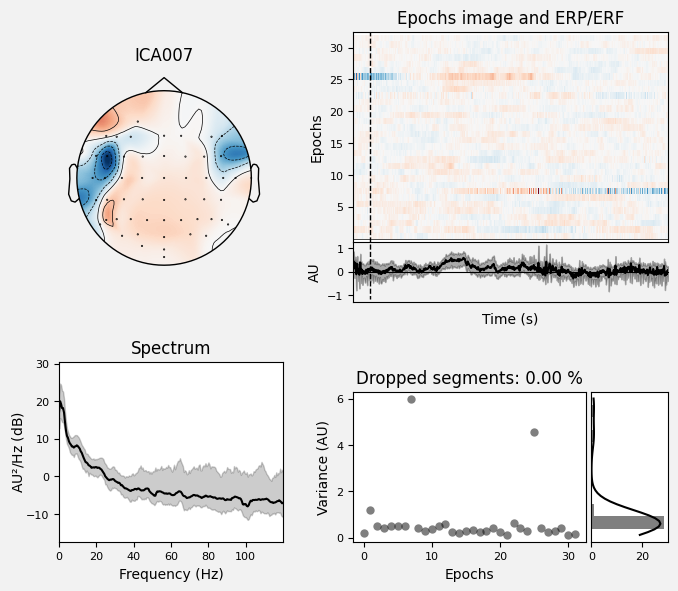

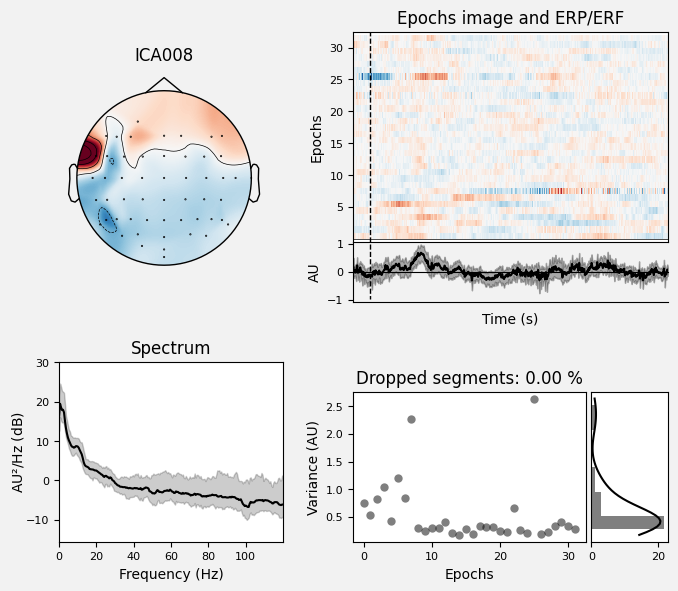

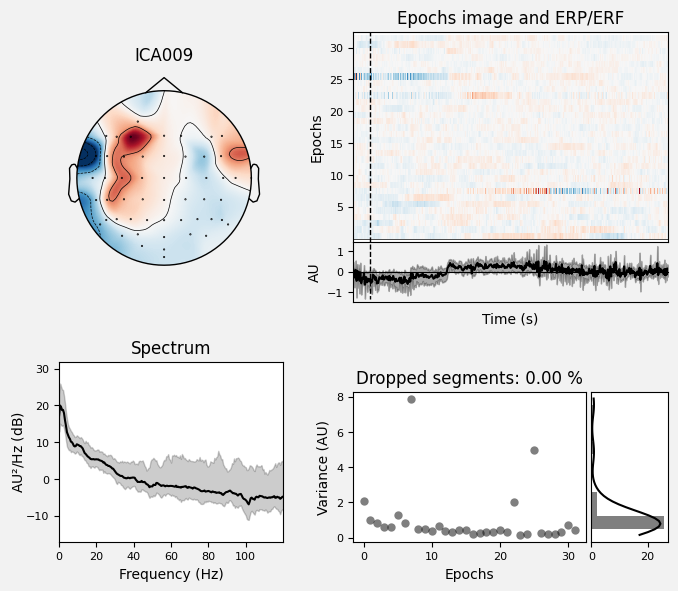

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [22]:
ica.plot_properties(
    epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = False,
    psd_args = dict(fmax=120))

In [25]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['left','right','rest'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=2)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [26]:
eog_indices


[0, 6, 1]

In [27]:
ica.apply(epochs, exclude=np.unique([0,1,6,7]))

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 4 ICA components
    Projecting back using 52 PCA components


<EpochsFIF |  69 events (all good), -2 - 7.99902 sec, baseline off, ~393.6 MB, data loaded,
 'r_pinch': 10
 'r_stop': 17
 'left': 15
 'right': 17
 'rest': 10>

ERP

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_7928\3154141180.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 1988 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 2048 out of 2048 | elapsed:    4.1s finished


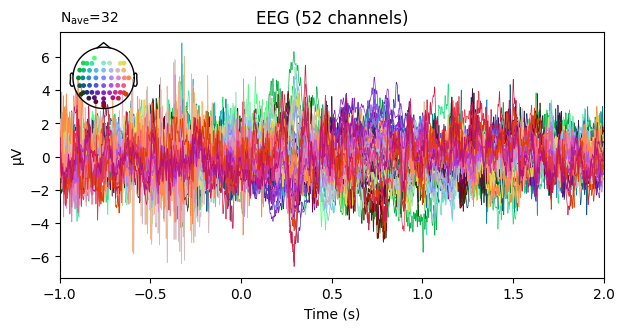

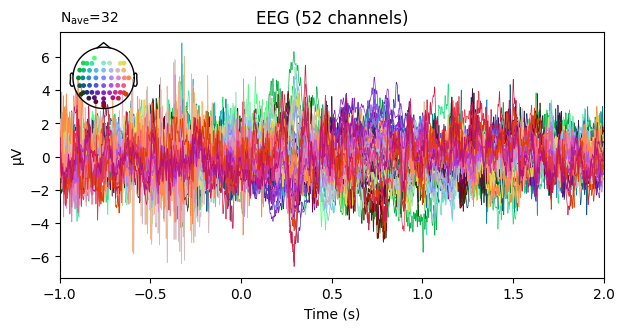

In [28]:
epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()

Setting up band-pass filter from 2 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 610 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 640 out of 640 | elapsed:    0.3s finished


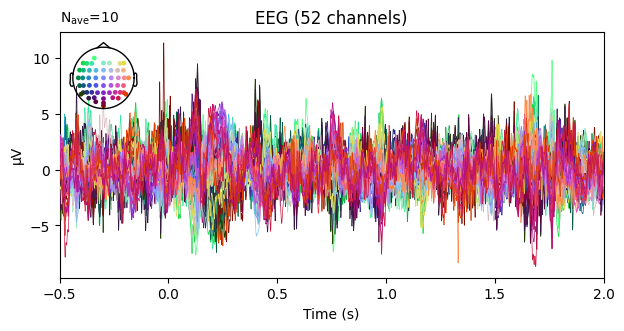

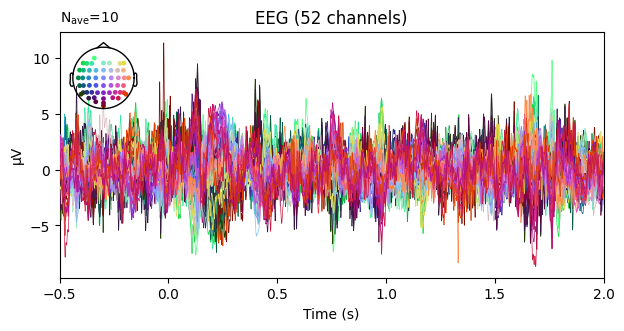

In [29]:
epochs['rest'].copy().crop(-0.5,2).filter(2,120, n_jobs=8).average().plot()

In [30]:
epochs.save('ica_epo.fif', overwrite=True)

In [43]:
epochs

<EpochsFIF |  53 events (all good), -2 - 7.99902 sec, baseline off, ~302.4 MB, data loaded,
 'r_pinch': 9
 'r_stop': 7
 'left': 12
 'right': 14
 'rest': 11>